<a href="https://colab.research.google.com/github/EslamAsfour/Custom_DL_Framework-Project/blob/main/(Final)LeNet_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Clone Github Repo

In [1]:
!git clone https://EslamAsfour:@github.com/EslamAsfour/Custom_DL_Framework-Project.git  

Cloning into 'Custom_DL_Framework-Project'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 359 (delta 19), reused 24 (delta 8), pack-reused 313
Receiving objects: 100% (359/359), 833.12 KiB | 14.12 MiB/s, done.
Resolving deltas: 100% (201/201), done.


## 1.1) Create Directory to auto save weights in it

In [2]:
cd Custom_DL_Framework-Project/

/content/Custom_DL_Framework-Project


In [3]:
mkdir Logs/

# 2) Training

## 2.1) Import Needed Modules

In [4]:
import numpy as np
from modules.Layer import *
from modules.LOSS_FUNC import Cross_Entropy_Loss
from modules.Activation_Function import Relu,Softmax
from modules.Net import Net
from modules.PreProcessing_data import GetData

## 2.2) Load Dataset

In [5]:
X_train,y_train,X_test, y_test = GetData()

Loadind data......
- Download progress: 100%
Download finished.
- Download progress: 100%
Download finished.
- Download progress: 100%
Download finished.
- Download progress: 100%
Download finished.
Preparing data......


## 2.3) Create LeNet Object with the needed Arch

In [6]:
LeNet = Net(layers=[
                    Conv2D(in_Channels= 1,out_Channels = 6, Kernal_Size= 5, Padding=2  ,Stride= 1),
                    Relu(), 
                    MaxPool2D(kernel_size=2), 
                    Conv2D(in_Channels= 6,out_Channels = 16, Kernal_Size= 5, Padding=0  ,Stride= 1),
                    Relu(),
                    MaxPool2D(kernel_size=2),
                    Conv2D(in_Channels= 16,out_Channels = 120, Kernal_Size= 5, Padding=0  ,Stride= 1),
                    Relu(),
                    Flatten(),
                    FullyConnectedLayer(input_dim= 120,output_dim=84),
                    Relu(),
                    FullyConnectedLayer(input_dim=84,output_dim=10),
                    ], loss=Cross_Entropy_Loss())

## 2.4) Start Training Loop with parameter Tuning

In [8]:
n_epoch = 10
batch_size = 32
batch_num = 0
total_Num_Patch = int(X_train.shape[0]/batch_size)

for e in range(n_epoch):
    batch_num = 0
    for batch_index in range(0, X_train.shape[0], batch_size):
        batch_num +=1
        if batch_index + batch_size < X_train.shape[0]:
            end_Index =   batch_index+batch_size
            x = X_train[ batch_index : end_Index ]
            y = y_train[ batch_index : end_Index ]
            
        else :
            end_Index =   X_train.shape[0]
            x = X_train[batch_index : end_Index]
            y = y_train[batch_index: end_Index]
        
        # Forward Prop
        out = LeNet(x)
        # Calc Accuracy
        
        preds = np.argmax(out, axis=1).reshape(-1, 1)
        accuracy_per_Patch = ( preds == y ).sum() / batch_size
        accuracy_per_Patch = accuracy_per_Patch*100
        # Calc Loss
        loss = LeNet.loss(out, y)
        
        
        # Backward Prop
        LeNet.backward()
        LeNet.weights_update(alpha=1e-3)
        
        print("Epoch no. %d , Patch no. %d/%d , loss =  %2f4 \t accuracy per patch = %d %%" % ( e + 1, batch_num, total_Num_Patch  ,loss, accuracy_per_Patch ))
        
        #Every 100 Batches Save the weights
        if batch_num % 100 == 0 :
            LeNet.save_weights(e+1,batch_num)

Epoch no. 1 , Patch no. 1/1875 , loss =  2.5116604 	 accuracy per patch = 3 %
Epoch no. 1 , Patch no. 2/1875 , loss =  2.5843584 	 accuracy per patch = 18 %
Epoch no. 1 , Patch no. 3/1875 , loss =  2.7229274 	 accuracy per patch = 9 %
Epoch no. 1 , Patch no. 4/1875 , loss =  2.6069324 	 accuracy per patch = 15 %
Epoch no. 1 , Patch no. 5/1875 , loss =  2.2846574 	 accuracy per patch = 15 %
Epoch no. 1 , Patch no. 6/1875 , loss =  2.4132654 	 accuracy per patch = 12 %
Epoch no. 1 , Patch no. 7/1875 , loss =  2.4975254 	 accuracy per patch = 9 %
Epoch no. 1 , Patch no. 8/1875 , loss =  2.3313234 	 accuracy per patch = 15 %
Epoch no. 1 , Patch no. 9/1875 , loss =  2.3910294 	 accuracy per patch = 12 %
Epoch no. 1 , Patch no. 10/1875 , loss =  2.3695504 	 accuracy per patch = 12 %
Epoch no. 1 , Patch no. 11/1875 , loss =  2.4854204 	 accuracy per patch = 9 %
Epoch no. 1 , Patch no. 12/1875 , loss =  2.4509254 	 accuracy per patch = 9 %
Epoch no. 1 , Patch no. 13/1875 , loss =  2.1773294 	 

KeyboardInterrupt: ignored

# 3) Testing and Evaluation

## 3.1) Import Needed Libraries

In [9]:
import cv2
import matplotlib.pyplot as plt


## 3.2) Load Weights

In [10]:
path = "Logs/Weights_(2)_(1800).pkl"
LeNet.load_weights(path)


## 3.3) Testing Randomly

Loadind data......
Preparing data......
Image Number 5
LeNet Prediction is 1


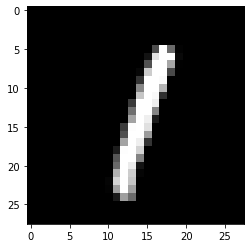

Image Number 6
LeNet Prediction is 4


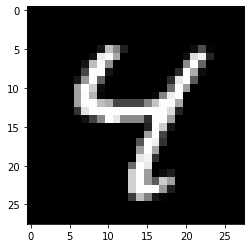

Image Number 100
LeNet Prediction is 6


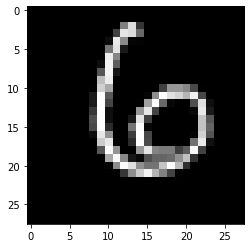

Image Number 500
LeNet Prediction is 3


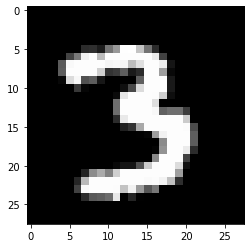

Image Number 199
LeNet Prediction is 2


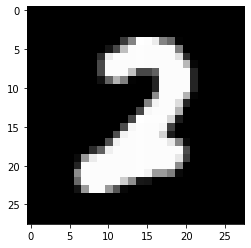

Image Number 1000
LeNet Prediction is 3


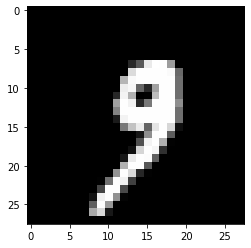

Image Number 800
LeNet Prediction is 8


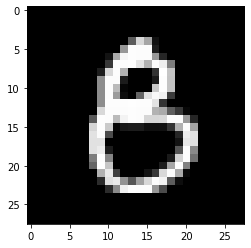

Image Number 890
LeNet Prediction is 3


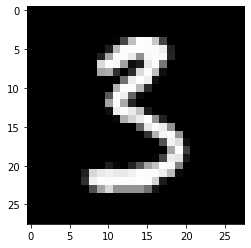

KeyboardInterrupt: ignored

In [11]:

Training_data,Training_labels,Testing_data , Testing_labels = GetData()

while (1):
    No_ofImage =input("Image Number ")
    if (not No_ofImage.isdigit()):
        break
    No_ofImage = int(No_ofImage)
    Testing_image=Testing_data[No_ofImage]
    Testing_image =Testing_image.reshape((1,1,28,28))
    Image_labels=Testing_labels[No_ofImage]

    #Forwarding path
    out = LeNet(Testing_image)

    #prediction of our Lenet model
    preds = np.argmax(out, axis=1).reshape(-1, 1)

    #output our model prediction
    print("LeNet Prediction is {}".format(preds[0][0]))

    #showing image
    Testing_image=Testing_image.reshape(28,28)
    plt.imshow(Testing_image,cmap='gray')
    plt.show()


## 3.4) Evaluation

In [12]:

Training_data,Training_labels,Testing_data , Testing_labels = GetData()

Classes_number = 10
Predictions = []

for image,label in zip (Testing_data ,Testing_labels):

    image =image.reshape((1,1,28,28))
    out = LeNet(image)  #output of forward path

    preds = np.argmax(out, axis=1).reshape(-1, 1) #prediction of our Lenet mode
    Predictions.append(preds[0][0])



def evaluation(No_of_classes,True_Label,Predicted_Label):
    
    confussion_matrix = np.zeros((No_of_classes,No_of_classes))
    True_Label=(True_Label.T)[0] 
    for TL,PL in zip(True_Label,Predicted_Label):
        confussion_matrix[TL][PL]=confussion_matrix[TL][PL]+1

    TP = np.zeros(No_of_classes)
    TN = np.zeros(No_of_classes)
    FP = np.zeros(No_of_classes)
    FN = np.zeros(No_of_classes)
    for i in range(No_of_classes):
        TP[i] = confussion_matrix[i][i]
    Matrix_sum = np.sum(confussion_matrix)
    raw_sum = np.sum(confussion_matrix, axis = 1) 
    column_sum = np.sum(confussion_matrix,axis = 0)
    for i in range(No_of_classes):
        TN[i]= Matrix_sum-(raw_sum[i]+column_sum[i])+confussion_matrix[i][i]
    for i in range(No_of_classes):
        FP[i]= column_sum[i]-confussion_matrix[i][i]
    for i in range(No_of_classes):
        FN[i]=raw_sum[i]-confussion_matrix[i][i]

    accurecy =  np.sum(TP)/Matrix_sum
    accurecy=round(accurecy,2)
    Precision = np.zeros(No_of_classes)

    for i in range(No_of_classes):
        Precision[i]=TP[i]/(TP[i]+FN[i])
        Precision[i]=round(Precision[i],2)
    Recall = np.zeros(No_of_classes)

    for i in range(No_of_classes):
        Recall[i] = TP[i]/(TP[i]+TN[i])
        Recall[i]=round(Recall[i],2)
    print("TP:",TP)
    print("TN:",TN)
    print("FP:",FP)
    print("FN",FN)
    print("acc:",accurecy)
    print("Per:",Precision)
    print("Rec:",Recall)
    precision_Avg = round(np.sum(Precision)/No_of_classes,2)
    Recall_Avg = round(np.sum(Recall)/No_of_classes,2)

    print("Avg precision",precision_Avg)
    print("Avg ReCall",Recall_Avg)



evaluation(Classes_number,Testing_labels,Predictions)


Loadind data......
Preparing data......
TP: [ 963. 1103.  954.  945.  879.  792.  894.  958.  855.  844.]
TN: [8963. 8844. 8871. 8867. 8966. 9039. 8979. 8845. 8886. 8927.]
FP: [ 57.  21.  97. 123.  52.  69.  63. 127. 140.  64.]
FN [ 17.  32.  78.  65. 103. 100.  64.  70. 119. 165.]
acc: 0.92
Per: [0.98 0.97 0.92 0.94 0.9  0.89 0.93 0.93 0.88 0.84]
Rec: [0.1  0.11 0.1  0.1  0.09 0.08 0.09 0.1  0.09 0.09]
Avg precision 0.92
Avg ReCall 0.1
